In [1]:
import numpy as np
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import load_model

# ***Analysis de similaridad en nuestro modelo***

In [2]:
MODELO1 = load_model(r"C:\Users\Maqui\Documentss\INTERNSHIP\CNN\Age&Gender2.h5")
MODELO1_1 = load_model(r"C:\Users\Maqui\Documents\INTERNSHIP\CNN\Model_25-08.h5")
MODELO2 = load_model(r"C:\Users\Maqui\Documents\INTERNSHIP\CNN\192X192.h5")

## ***CNN entender mas***

### ***Correlation***

(3, 3, 1, 32)


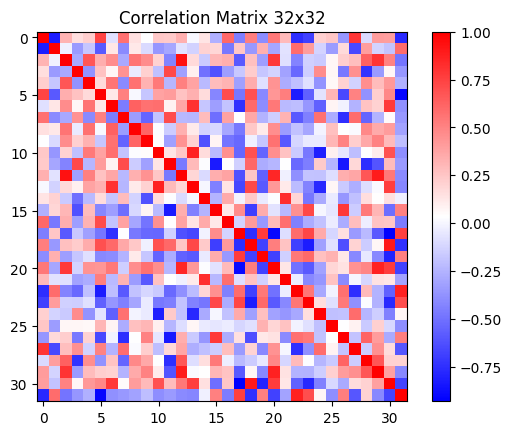

Highly correlated kernels:
2_12 = 0.9268298140214608
6_13 = 0.8086579733012678
10_13 = 0.8781079391785109
12_20 = 0.8514811471697405
12_29 = 0.890689315456381
14_21 = 0.8261312935743655
18_30 = 0.8949088545161847
20_29 = 0.8687747924019745
22_31 = 0.8694416210767395

Inversely correlated kernels:
5_31 = -0.9053247316912547
17_20 = -0.8928965056854459
17_30 = -0.9298959094082437


In [11]:
def correlation_analysis(index, model):  
    '''
    Performs the correlation between the kernels of each layer of the trained model for age and gender recognition. 
    receives as a parameter the layer to be analyzed as follows:

    1 first layer with 32 features
    3 second layer with 64 features
    5 third layer with 128 features
    7 fourth layer with 256 features
    '''


    size = (model.layers[index].get_weights()[0])[0][0][0].size
    kernels_tensor = model.layers[index].get_weights()[0]
    print(kernels_tensor.shape)

    # Reshape the kernel weights matrix into a 2D matrix
    if index == 1: index_2 = 9
    elif index == 3: index_2 = 288
    elif index == 5: index_2 = 576
    elif index == 7: index_2 = 1152
    kernels_matrix = kernels_tensor.reshape(index_2, size) 

    # Calculate the correlation matrix between the columns of the kernels_matrix
    correlation_matrix = np.corrcoef(kernels_matrix, rowvar=False)    
    
    # Display the correlation matrix as an image
    plt.imshow(correlation_matrix, cmap='bwr', interpolation='nearest')
    plt.title(f"Correlation Matrix {size}x{size}")
    plt.colorbar()
    plt.show()

    return correlation_matrix


index = 1
correLayer = correlation_analysis(index, MODELO2)

n = correLayer.shape[0]
highly_correlated= []
inversely_correlated=  []

desdeaqui1 = 0.8 # va desde aqui para arriba
desdeaqui2 = -0.85 # va desde aqui para abajo

for i in range(n):
    for j in range(i+1, n):
        kernel1 = f"{i}"
        kernel2 = f"{j}"
        correlacion = correLayer[i, j]
        # Comprobar si la correlación es alta o inversa
        if correlacion > desdeaqui1:
            # Escribir los datos en el archivo de correlaciones altas
            highly_correlated.append(f"{kernel1}_{kernel2} = {correlacion}")
        elif correlacion < desdeaqui2:
            # Escribir los datos en el archivo de correlaciones inversas
            inversely_correlated.append(f"{kernel1}_{kernel2} = {correlacion}")


print("Highly correlated kernels:")
for i in highly_correlated:
    print(i)

print("\nInversely correlated kernels:")
for i in inversely_correlated:
    print(i)

### ***Hamming distances***

(3, 3, 1, 32)


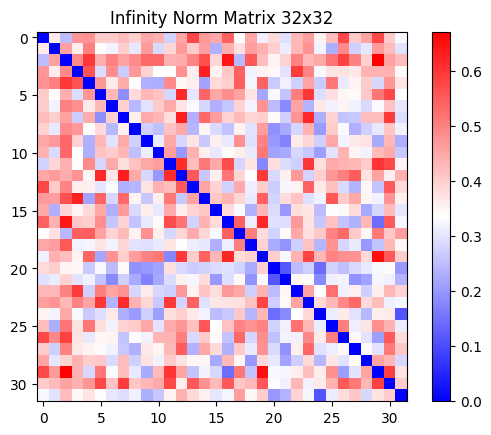

Highly Distancied kernels:
16_29 = 0.14252427220344543
20_21 = 0.11409011483192444
20_24 = 0.14375561475753784
24_31 = 0.11271971464157104


In [29]:
def HammingDistance(index,model):  
    '''
    Performs the correlation between the kernels of each layer of the trained model for age and gender recognition. 
    receives as a parameter the layer to be analyzed as follows:

    1 first layer with 32 features
    3 second layer with 64 features
    5 third layer with 128 features
    7 fourth layer with 256 features
    '''


    size = (model.layers[index].get_weights()[0])[0][0][0].size
    kernels_tensor = model.layers[index].get_weights()[0]
    print(kernels_tensor.shape)

    
    if index == 1: index_2 = 0
    elif index == 3: index_2 = 31
    elif index == 5: index_2 = 63
    elif index == 7: index_2 = 127


    suma = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            suma[i,j] = np.max(np.abs(kernels_tensor[:, :, index_2, i] - kernels_tensor[:, :, index_2, j])) # Infinity Norm
            # suma[i,j] = np.sum(np.abs(kernels_tensor[:, :, index_2, i] - kernels_tensor[:, :, index_2, j])) # Hamming Distance

    
    # Display Hamming Distance Matrix
    plt.imshow(suma, cmap='bwr', interpolation='nearest')
    plt.title(f"Infinity Norm Matrix {size}x{size}")
    plt.colorbar()
    plt.show()


    return suma


hamin = HammingDistance(index,MODELO1_1)

n = hamin.shape[0]
highly_correlated = []

min = 0
max =  0.17

for i in range(n):
    for j in range(i+1, n):
        kernel1 = f"{i}"
        kernel2 = f"{j}"
        distancia = hamin[i, j]
        # Comprobar si la correlación es alta o inversa
        if  max > distancia >= min:
            # Escribir los datos en el archivo de distancias altas
            highly_correlated.append(f"{kernel1}_{kernel2} = {distancia}")


print("Highly Distancied kernels:")
for i in highly_correlated:
    print(i)

### ***Cosine similarity***

(3, 3, 1, 32)


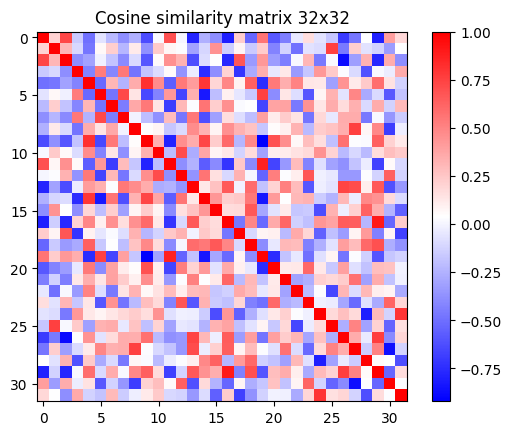

Highly correlated kernels:
4_9 = 0.813294529914856
11_19 = 0.869778573513031
16_29 = 0.8973078727722168
24_31 = 0.8044606447219849

Inversely correlated kernels:
0_16 = -0.8047523498535156
2_26 = -0.879016637802124
5_14 = -0.8264913558959961
9_19 = -0.9203335046768188
14_19 = -0.8351855874061584
24_28 = -0.8015552759170532
27_30 = -0.8649389147758484


In [34]:
def cosine_similarity_matrix(index, model):
    '''
    Performs the correlation between the kernels of each layer of the trained model for age and gender recognition. 
    receives as a parameter the layer to be analyzed as follows:

    1 first layer with 32 features
    3 second layer with 64 features
    5 third layer with 128 features
    7 fourth layer with 256 features
    '''


    size = (model.layers[index].get_weights()[0])[0][0][0].size
    kernels_tensor = model.layers[index].get_weights()[0]
    print(kernels_tensor.shape)

    # Reshape the kernel weights matrix into a 2D matrix
    if index == 1: index_2 = 0
    elif index == 3: index_2 = 31
    elif index == 5: index_2 = 63
    elif index == 7: index_2 = 127
    
    similarity_matrix = np.zeros((size,size))
    for i in range(size):
        for j in range(size):

            vector1 = [elemento for fila in kernels_tensor[:,:,index_2,i] for elemento in fila]
            vector2 = [elemento for fila in kernels_tensor[:,:,index_2,j] for elemento in fila]

            # Get the dot product between the two matrices
            dot_product = np.dot(vector1, vector2)
            
            norm_i = np.linalg.norm(vector1)
            norm_j = np.linalg.norm(vector2)
            
            similarity_matrix[i, j] = dot_product/(norm_i * norm_j)
            

    # Display similarity Matrix
    plt.imshow(similarity_matrix, cmap='bwr', interpolation='nearest')
    plt.title(f"Cosine similarity matrix {size}x{size}")
    plt.colorbar()
    plt.show()

    return similarity_matrix


cosine = cosine_similarity_matrix(index, MODELO1_1)


n = cosine.shape[0]
highly_correlated= []
inversely_correlated=  []

desdeaqui1 = 0.8 # va desde aqui para arriba
desdeaqui2 = -0.8 # va desde aqui para abajo

for i in range(n):
    for j in range(i+1, n):
        kernel1 = f"{i}"
        kernel2 = f"{j}"
        similitud = cosine[i, j]
        # Comprobar si la correlación es alta o inversa
        if similitud > desdeaqui1:
            # Escribir los datos en el archivo de similitudes altas
            highly_correlated.append(f"{kernel1}_{kernel2} = {similitud}")
        elif similitud < desdeaqui2:
            # Escribir los datos en el archivo de similitudes inversas
            inversely_correlated.append(f"{kernel1}_{kernel2} = {similitud}")


print("Highly correlated kernels:")
for i in highly_correlated:
    print(i)

print("\nInversely correlated kernels:")
for i in inversely_correlated:
    print(i)



### ***Histogram***

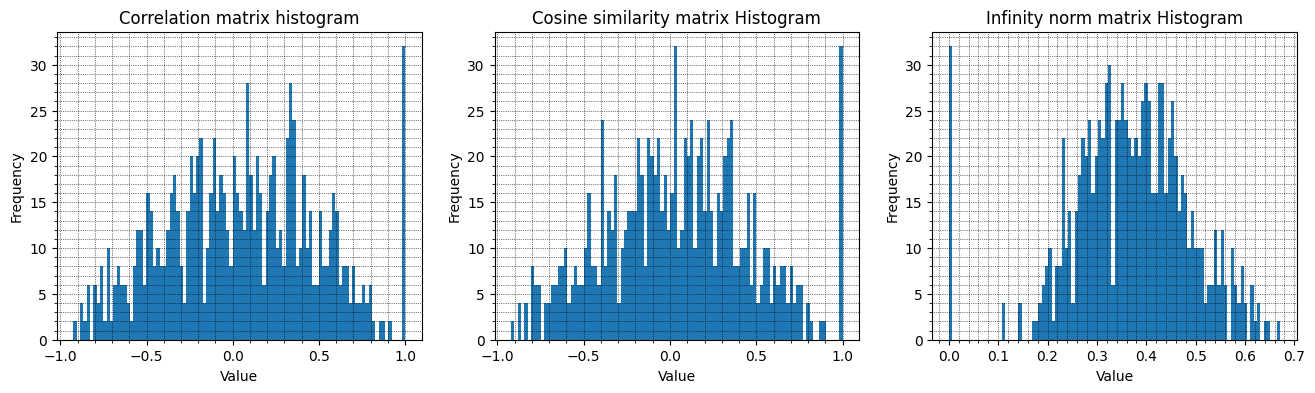

In [31]:
def plot_correlation_matrix(correlation_matrix,hamindistance, similarity):
    '''
    Displays the correlation matrix as an image and the histogram of the correlation values
    '''


    # Display the correlation matrix as an image
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))

    # Display the histogram of the correlation values
    _, _, _= ax1.hist(correlation_matrix.flatten(), bins=100)
    ax1.set_title('Correlation matrix histogram')

    # Display the histogram of the Infinity norm values
    _, _, _= ax3.hist(hamindistance.flatten(), bins=100)
    ax3.set_title('Infinity norm matrix Histogram')

    # Display the histogram of the cosine similarity values
    _, _, _= ax2.hist(similarity.flatten(), bins=100)
    ax2.set_title('Cosine similarity matrix Histogram')
   

    for a in (ax1, ax2, ax3):
        a.set_xlabel('Value')
        a.set_ylabel('Frequency')
        a.grid(which='major', linestyle=':', linewidth='0.5', color='black')
        a.minorticks_on()
        a.grid(which='minor', linestyle=':', linewidth='0.5', color='black')


    plt.show()  


plot_correlation_matrix(correLayer,hamin,cosine)

## ***Using some Kernels***

#### *Get Random Database Image*

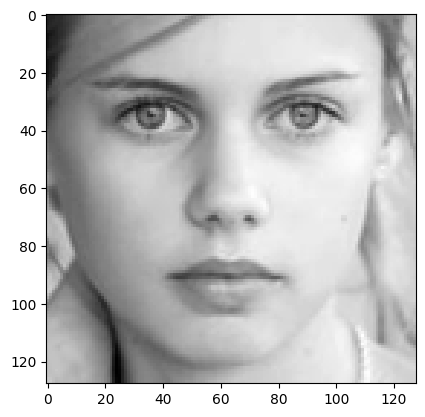

In [32]:
def random_image():
    datarute = r'C:\Users\Maqui\Documents\INTERNSHIP\CNN\UTKFace-crop_Renamed' 
    image_files = os.listdir(datarute)
    random_index = np.random.randint(0, len(image_files) - 1)
    random_image_filename = image_files[random_index]
    random_image_path = os.path.join(datarute, random_image_filename)

    # print(random_image_path)
    image = Image.open(random_image_path)
    image_gray = image.convert('L')
    image_gray = image_gray.resize((128, 128))
    image_gray = np.array(image_gray)

    return image_gray

img = random_image()
plt.imshow(img, cmap='gray', interpolation='nearest')
plt.show()


#### *Choose the kernel to use*

In [12]:
# index = 7

if index == 1: index_2 = 0
elif index == 3: index_2 = 31
elif index == 5: index_2 = 63
elif index == 7: index_2 = 127

kernels_tensor1 = MODELO1.layers[index].get_weights()[0]
kernels_tensor2 = MODELO2.layers[index].get_weights()[0]
kernels_tensor1_1 = MODELO1_1.layers[index].get_weights()[0]

# print(kernels_tensor1.shape)
# print(kernels_tensor2.shape)
# print(kernels_tensor1_1.shape)

# # Elige un kernel aleatorio #
# size = (kernels_tensor1_1)[0][0][0].size
# kernelNum = np.random.randint(0,size)
# print(kernelNum)

kernelNum1 = 2
kernelNum2 = 12

kernel1 = kernels_tensor2[:, :, index_2, kernelNum1]
kernel2= kernels_tensor2[:, :, index_2, kernelNum2]

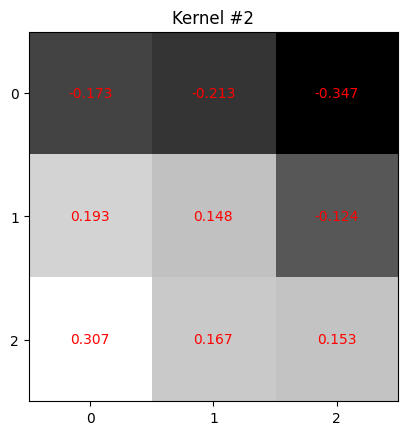

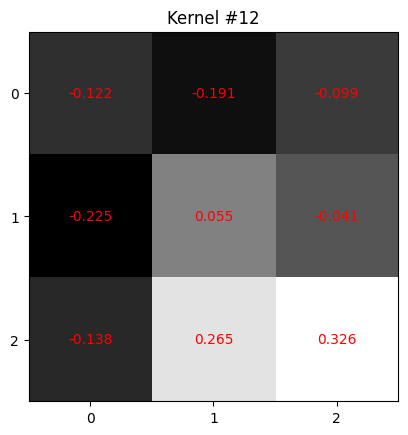

In [13]:
plt.imshow(kernel1, cmap="gray")
plt.title(f'Kernel #{kernelNum1}')
for i in range(kernel1.shape[0]):
    for j in range(kernel1.shape[1]):
        value = kernel1[i, j]
        plt.text(j, i, str(np.round(value,3)), ha='center', va='center', color='red')
plt.xticks(np.arange(kernel1.shape[1]))
plt.yticks(np.arange(kernel1.shape[0]))
plt.show()

plt.imshow(kernel2, cmap="gray")
plt.title(f'Kernel #{kernelNum2}')
for i in range(kernel2.shape[0]):
    for j in range(kernel2.shape[1]):
        value = kernel2[i, j]
        plt.text(j, i, str(np.round(value,3)), ha='center', va='center', color='red')
plt.xticks(np.arange(kernel2.shape[1]))
plt.yticks(np.arange(kernel2.shape[0]))
plt.show()

#### *Displaying all kernels*

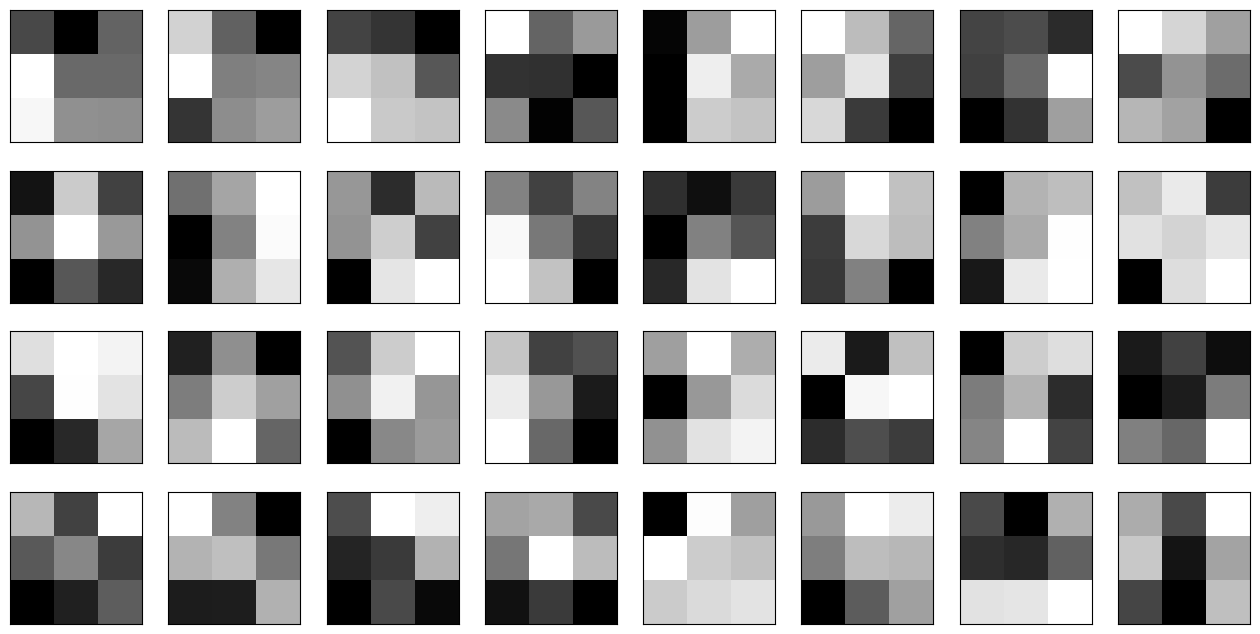

In [ ]:
# Print All Kernels
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(kernels_tensor1_1[:, :, 0, i], cmap='gray', interpolation='nearest')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()


#### *Displaying convolutions*

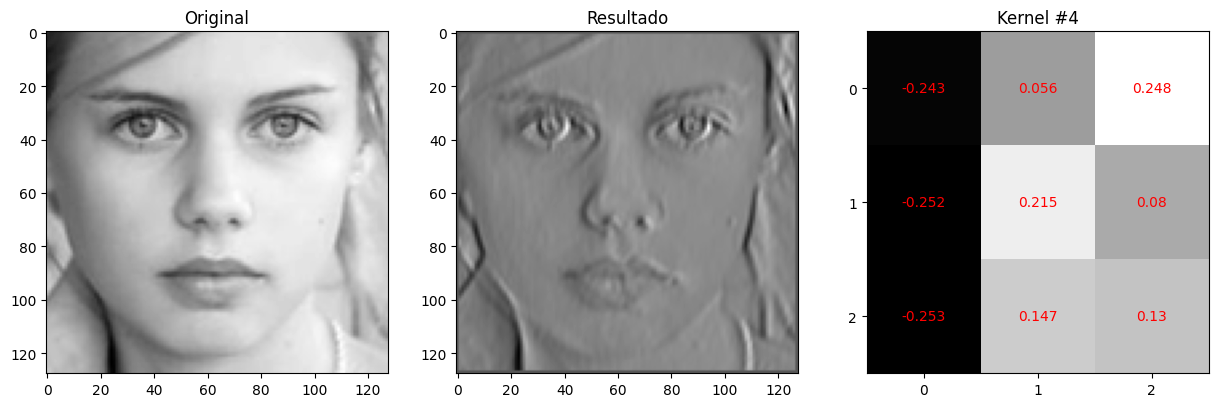

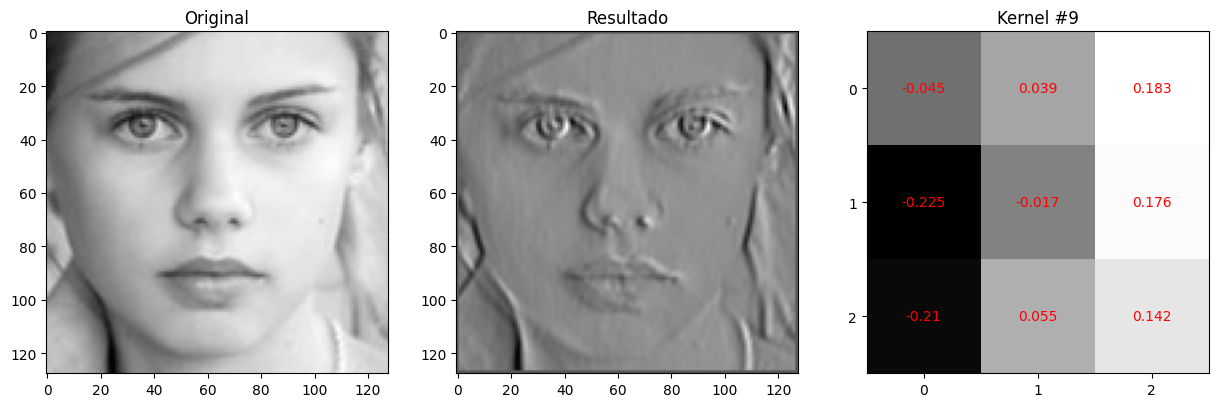

In [36]:
def show_OFK(imagen, imagen_resultado, kernel, kernelnum):
    plt.figure(figsize=(15, 15))
    plt.subplot(131)
    plt.imshow(imagen, cmap="gray")
    plt.title('Original')
    plt.subplot(132)
    plt.imshow(imagen_resultado, cmap="gray")
    plt.title('Resultado')
    plt.subplot(133)
    plt.imshow(kernel, cmap="gray")
    plt.title(f'Kernel #{kernelnum}')
    for i in range(kernel.shape[0]):
        for j in range(kernel.shape[1]):
            value = kernel[i, j]
            plt.text(j, i, str(np.round(value,3)), ha='center', va='center', color='red')
    plt.xticks(np.arange(kernel.shape[1]))
    plt.yticks(np.arange(kernel.shape[0]))
    plt.show()


def convolucionador(imag, kernel):
    ancho, alto = imag.shape
    imag_resultado = np.zeros((alto, ancho))

    for x in range(1, ancho - 1):
        for y in range(1, alto - 1):
            valor_pixel = 0
            for i in range(3):
                for j in range(3):
                    valor_pixel += imag[y - 1 + i, x - 1 + j] * kernel[i, j]

            valor_pixel = valor_pixel / 255
            
            imag_resultado[y, x] = valor_pixel
            
    return imag_resultado


filtered_image1 = convolucionador(img, kernel1)
show_OFK(img, filtered_image1, kernel1, kernelNum1)
filtered_image2 = convolucionador(img, kernel2)
show_OFK(img, filtered_image2, kernel2, kernelNum2)

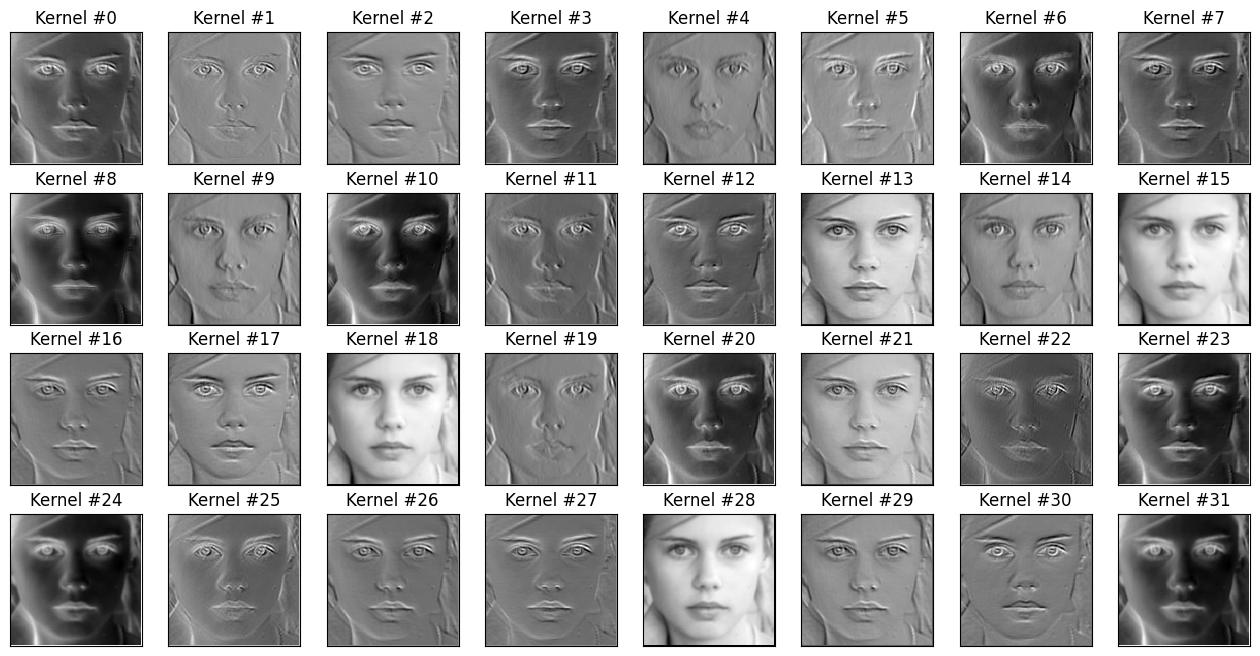

In [37]:
# Apply All kernels to the img and show the results with the corresponding kernel add all the filtered images to a list

filtred_images = []
for i in range(8):
    for j in range(4):
        
        kernel = kernels_tensor1_1[:, :, 0, i*4+j]
        filtred_image = convolucionador(img, kernel)
        filtred_images.append(filtred_image)

# Display the images
fig, axes = plt.subplots(4, 8, figsize=(16, 8))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(filtred_images[i], cmap='gray', interpolation='nearest')
    ax.set_title(f'Kernel #{i}')
    # ax.text(0,0,str(i), ha='center', va='center', color='red')
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

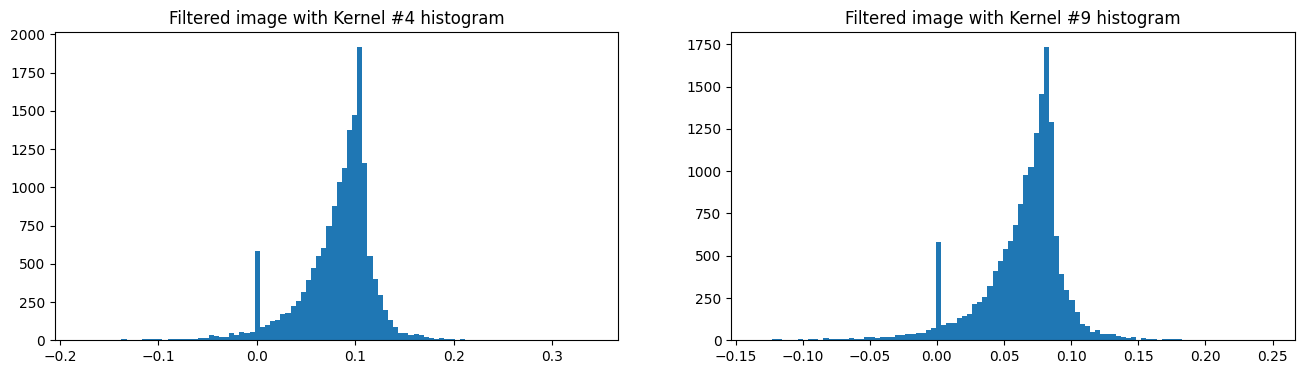

In [40]:
# Filtered image1 y 2 histogram
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
_, _, _= ax1.hist(filtered_image1.flatten(), bins=100)
ax1.set_title(f'Filtered image with Kernel #{kernelNum1} histogram')
_, _, _= ax2.hist(filtered_image2.flatten(), bins=100)
ax2.set_title(f'Filtered image with Kernel #{kernelNum2} histogram')
plt.show()
